In [2]:
# import packages
import numpy as np
import pandas as pd
import os
import datetime as dt
import stat
from scipy.stats import pointbiserialr, pearsonr
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

#for text processing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
nltk.download('wordnet')
import string
import gensim
import sklearn

[nltk_data] Downloading package punkt to /Users/umer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/umer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/umer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/umer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
raw_data = pd.read_csv("train-balanced-sarcasm.csv")

/Users/umer/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
labels = raw_data['label']
raw_data_without_labels = raw_data.drop(columns='label')
train_data, test_data = sklearn.model_selection.train_test_split(raw_data, test_size=0.2, random_state=123)

In [6]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2/11/15 3:44,We need to take some shots down the field. Being way too fucking careful with this play calling while down 14. It's not the end of the world if Rodgers throws a pick.
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,21/10/16 15:51,"About 71 million watch final presidential debate, beating 2008 and 2012"
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,27/11/16 18:34,How much you want to bet that the artist was making a regular tiger then fucked up and added all those heads and made something even better than what they intended to?
366838,1,"Can't have a discussion on one without the other, right?",iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,28/3/16 16:33,"And of course there are the ""what about circumcision?"" assholes who can't have things *not* be about them."
907940,1,"That dude's friend's life is nowhere near as important than OP's need to never, ever have to be reminded that the choking game is a thing.",HerkDerpner,rage,1.0,1.0,0.0,2013-03,26/3/13 2:12,Maybe he found out that one of his friends likes to do this. He doesn't want to embarrass him by telling him that he knows but he is concerned for his safety so he made this status to point out the dangers. HE'S JUST TRYING TO HELP HIS FRIEND OP LEARN SOME EMPATHY.


In [7]:
train_data.shape

(808661, 10)

In [8]:
train_data.describe()

,score,ups,downs
count,808660.00000,808660.000000,808660.000000
mean,6.90855,5.525740,-0.146248
std,47.49472,41.662989,0.353355
min,-507.00000,-507.000000,-1.000000
25%,1.00000,0.000000,0.000000
50%,2.00000,1.000000,0.000000
75%,4.00000,3.000000,0.000000
max,5818.00000,5163.000000,0.000000


In [9]:
train_data.info()
train_data['label'] = train_data['label'].astype(str)
i = train_data.loc[train_data['label'].str.startswith('A') == True].index
train_data = train_data.drop(i)

train_data['label'] = train_data['label'].astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808661 entries, 417033 to 773630
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           808661 non-null  object 
 1   comment         808618 non-null  object 
 2   author          808660 non-null  object 
 3   subreddit       808660 non-null  object 
 4   score           808660 non-null  float64
 5   ups             808660 non-null  float64
 6   downs           808660 non-null  float64
 7   date            808660 non-null  object 
 8   created_utc     808660 non-null  object 
 9   parent_comment  808660 non-null  object 
dtypes: float64(3), object(7)
memory usage: 67.9+ MB


<ipython-input-9-ed4c424f996e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = train_data['label'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 808660 entries, 417033 to 773630
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           808660 non-null  int64  
 1   comment         808618 non-null  object 
 2   author          808660 non-null  object 
 3   subreddit       808660 non-null  object 
 4   score           808660 non-null  float64
 5   ups             808660 non-null  float64
 6   downs           808660 non-null  float64
 7   date            808660 non-null  object 
 8   created_utc     808660 non-null  object 
 9   parent_comment  808660 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 67.9+ MB


In [10]:
#remove null comments
pd.isnull(train_data['comment']).sum()
train_data = train_data.dropna(subset=['comment'])
pd.isnull(train_data['comment']).sum()

0

In [11]:
#check comments with one letters and their labels
df = train_data.loc[train_data['comment'].str.len() < 2]
print(df.shape)
df.loc[df['label'] == 1].shape

(971, 10)


(58, 10)

In [12]:
#remove comments with less than 2 characters
train_data = train_data.drop(train_data[train_data['comment'].str.len() < 2].index)
#verify 0 rows
train_data.loc[train_data['comment'].str.len() < 2].shape

(0, 10)

In [13]:
#verify that there is no null value
train_data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [14]:
# How is a comment's score determined?
# According to the same principles as a submission's score.
# 
# A comment's score is simply the number of upvotes minus the number of downvotes. 
# If five users like the comment and three users don't it will have a score of 2. 
# Please note that the vote numbers are not "real" numbers, they have been "fuzzed" to prevent spam bots etc. 
# So taking the above example, if five users upvoted the comment, and three users downvote it, 
# the upvote/downvote numbers may say 23 upvotes and 21 downvotes, or 12 upvotes, and 10 downvotes. 
# The points score is correct, but the vote totals are "fuzzed".

# train_data.drop(['ups', 'downs'], axis=1)
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2/11/15 3:44,We need to take some shots down the field. Being way too fucking careful with this play calling while down 14. It's not the end of the world if Rodgers throws a pick.
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,21/10/16 15:51,"About 71 million watch final presidential debate, beating 2008 and 2012"
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,27/11/16 18:34,How much you want to bet that the artist was making a regular tiger then fucked up and added all those heads and made something even better than what they intended to?
366838,1,"Can't have a discussion on one without the other, right?",iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,28/3/16 16:33,"And of course there are the ""what about circumcision?"" assholes who can't have things *not* be about them."
907940,1,"That dude's friend's life is nowhere near as important than OP's need to never, ever have to be reminded that the choking game is a thing.",HerkDerpner,rage,1.0,1.0,0.0,2013-03,26/3/13 2:12,Maybe he found out that one of his friends likes to do this. He doesn't want to embarrass him by telling him that he knows but he is concerned for his safety so he made this status to point out the dangers. HE'S JUST TRYING TO HELP HIS FRIEND OP LEARN SOME EMPATHY.


In [15]:
#convert to datetime objects
train_data['created_utc'] = pd.to_datetime(train_data.created_utc)
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Being way too fucking careful with this play calling while down 14. It's not the end of the world if Rodgers throws a pick.
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,"About 71 million watch final presidential debate, beating 2008 and 2012"
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was making a regular tiger then fucked up and added all those heads and made something even better than what they intended to?
366838,1,"Can't have a discussion on one without the other, right?",iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circumcision?"" assholes who can't have things *not* be about them."
907940,1,"That dude's friend's life is nowhere near as important than OP's need to never, ever have to be reminded that the choking game is a thing.",HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends likes to do this. He doesn't want to embarrass him by telling him that he knows but he is concerned for his safety so he made this status to point out the dangers. HE'S JUST TRYING TO HELP HIS FRIEND OP LEARN SOME EMPATHY.


Text(0.5, 1.0, 'Correlation Heatmap b/w numerical features')

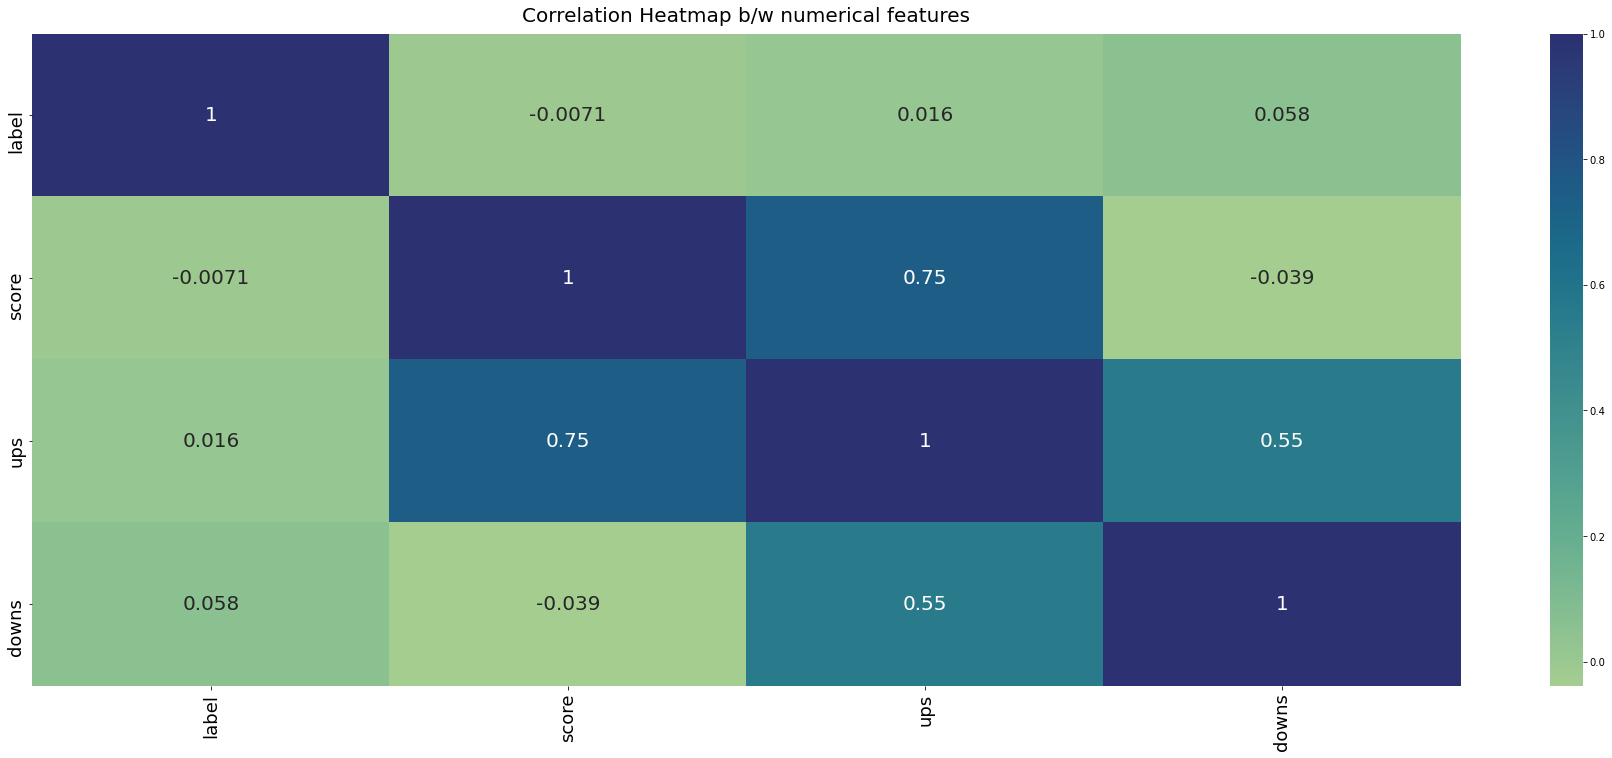

In [16]:
#heatmap for correlation b/w numerical features
plt.figure(figsize=(32,12))
corrMatrix = train_data.corr(method='spearman')

heatmap = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 20}, cmap="crest")
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18, rotation=90)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)
heatmap.set_title('Correlation Heatmap b/w numerical features', fontdict={'fontsize':20}, pad=12)

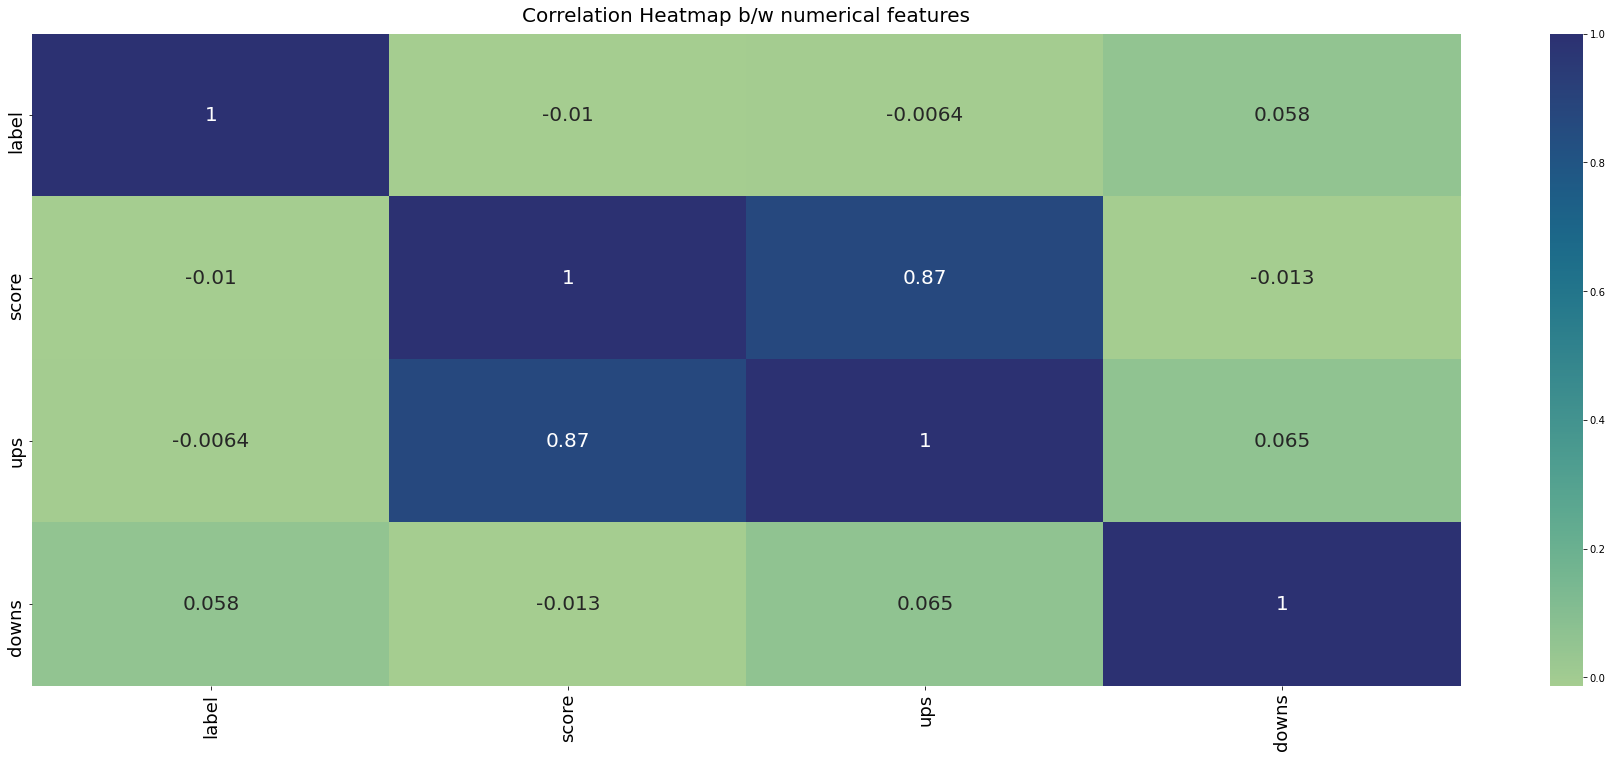

In [17]:
plt.figure(figsize=(32,12))
#pearson assumes linear r/s
corrMatrix = train_data.corr(method='pearson')

heatmap = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 20}, cmap="crest")
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18, rotation=90)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)
heatmap.set_title('Correlation Heatmap b/w numerical features', fontdict={'fontsize':20}, pad=12)
plt.show()

<AxesSubplot:xlabel='ratio', ylabel='subreddit'>

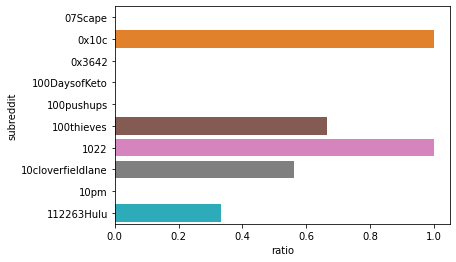

In [18]:
#which subreddit has the most sarcasm?
def c_ratio(df):
    no_sarcasm = sum((df["label"]==0))
    sarcasm = sum((df["label"]==1))
    return sarcasm/(sarcasm + no_sarcasm)

# sub_data = train_data.sample(n=100, random_state=30)
sub_df = train_data.groupby("subreddit").apply(c_ratio).reset_index(name='ratio')
sub_df2 = sub_df.sort_values(by=['ratio'])
sns.barplot(data=sub_df.iloc[0:10, ], y="subreddit", x='ratio')

In [19]:
#check the number of comments per subbredit
sub_df3 = train_data.groupby(["subreddit"]).size().reset_index(name='num_comments')
sub_df3['ratio'] = sub_df['ratio']
sub_df4 = sub_df3.sort_values(by=['ratio'], ascending = False)
sub_df4.head(10)

,subreddit,num_comments,ratio
6764,VGMvinyl,1,1.0
6450,TodayIWon,1,1.0
6378,The_Donald_Discuss,1,1.0
6386,ThemsFightinHerds,1,1.0
6391,Thestrongests9ball,1,1.0
6393,ThickChixxx,1,1.0
6404,ThisIsWhyTrumpWon,1,1.0
6407,ThreeLions,1,1.0
6409,Threesome,1,1.0
6421,Tigerstaden,1,1.0


In [20]:
#high proportion of perfectly sarcastic subreddits have comments < 5 [KIV]
sub_df4[(sub_df4['num_comments'] < 5) & (sub_df4['ratio'] == 1)].size / sub_df4[(sub_df4['ratio'] == 1)].size

0.9926354550236718

In [21]:
def word_count(df):
  return len(df["comment"])
train_data["word_count"] = train_data['comment'].str.split().str.len()

Text(0.5, 1.0, 'Sarcasm comments word count')

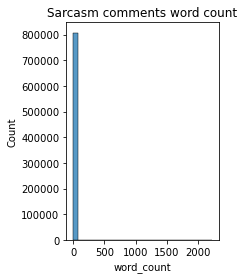

In [22]:
plt.subplot(1,2,1)
sns.histplot(data=train_data,x='word_count',bins=30)
plt.title("Sarcasm comments word count")

In [23]:
train_data['punctuation_count'] = train_data['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

sarcastic_punc_proportion = train_data.loc[(train_data['label'] == 1) & (train_data['punctuation_count'] > 0)].size / train_data.loc[train_data['label'] == 1].size
non_sarcastic_punc_proportion = train_data.loc[(train_data['label'] == 0) & (train_data['punctuation_count'] > 0)].size / train_data.loc[train_data['label'] == 0].size
print('sarcastic:', sarcastic_punc_proportion, 'non-sarcastic:', non_sarcastic_punc_proportion)

sarcastic: 0.82663459587336 non-sarcastic: 0.8506273216352241


In [24]:
sarcastic_dict = {}
def punctuation_count(df):
    for punc in string.punctuation:
        sarcastic_dict[punc] = 0
        
    for comment in df:
        for char in comment:
            if (char in sarcastic_dict):
                sarcastic_dict[char] += 1
    return sarcastic_dict

sarcastic_data = train_data.loc[train_data["label"] == 1]
non_sarcastic_data = train_data.loc[train_data["label"] == 0]

sarcastic_data.comment.size
sarc_dict = punctuation_count(sarcastic_data['comment'])
non_sarc_dict = punctuation_count(non_sarcastic_data['comment'])

sarcastic_data.size

4849272

In [25]:
non_sarcastic_data.size

4842492

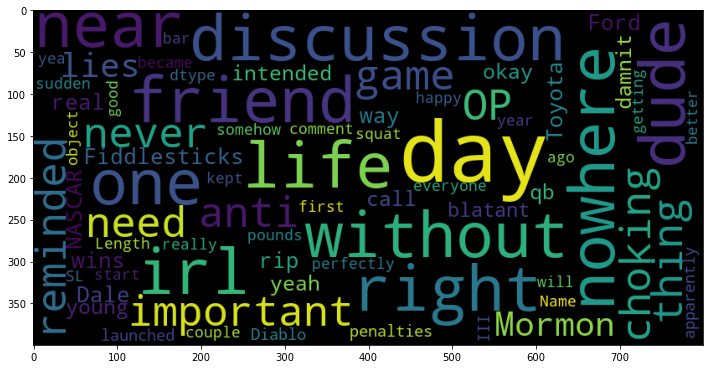

In [26]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_data.loc[train_data['label'] == 1, 'comment']))
plt.grid(b= False)
plt.imshow(wordcloud)

In [27]:
import re
s1 = "This has no long words"
s2 = "This has oooone loooooong word"

def has_long(sentence):
#     count = 0
    elong = re.compile("([a-zA-Z])\\1{2,}")
    return int(bool(elong.search(sentence)))

In [28]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,word_count,punctuation_count
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Being way too fucking careful with this play calling while down 14. It's not the end of the world if Rodgers throws a pick.,6,0
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,"About 71 million watch final presidential debate, beating 2008 and 2012",10,1
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was making a regular tiger then fucked up and added all those heads and made something even better than what they intended to?,2,0
366838,1,"Can't have a discussion on one without the other, right?",iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circumcision?"" assholes who can't have things *not* be about them.",10,3
907940,1,"That dude's friend's life is nowhere near as important than OP's need to never, ever have to be reminded that the choking game is a thing.",HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends likes to do this. He doesn't want to embarrass him by telling him that he knows but he is concerned for his safety so he made this status to point out the dangers. HE'S JUST TRYING TO HELP HIS FRIEND OP LEARN SOME EMPATHY.,26,5


<h2> Feature engineering </h2>

In [29]:
train_data['has_repeated']=train_data['comment'].apply(lambda x: has_long(x))

In [30]:
from scipy.stats import chi2_contingency

In [31]:
# Find Cramer's V correlation since both are categorical variables
categorical_variables = ['label', 'has_repeated']
total_len = len(categorical_variables)
for idx1 in range(total_len-1):
  for idx2 in range(idx1+1, total_len):
    cat_var1 = categorical_variables[idx1]
    cat_var2 = categorical_variables[idx2]    
    c_matrix = pd.crosstab(train_data[cat_var1], train_data[cat_var2])

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(c_matrix)[0]
    n = c_matrix.sum().sum()
    phi2 = chi2/n
    r,k = c_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    if corr >= 0.0:
        print(f'categorical variable 1 {cat_var1}, categorical variable 2: {cat_var2}, correlation: {corr}')

categorical variable 1 label, categorical variable 2: has_repeated, correlation: 0.013641994854725944


In [32]:
(train_data.loc[(train_data['has_repeated']>0) & (train_data['label']==1)].size) / train_data.loc[train_data['has_repeated'] > 0].size

0.5610886500345134

In [33]:
def exclaim_counter(sentence):
    count = 0
    for i in range(len(sentence)):
        if sentence[i] == '!':
            count += 1
    return count

train_data['exclaim_count'] = train_data['comment'].apply(lambda x: exclaim_counter(x))

In [34]:
def qns_mark_counter(sentence):
    count = 0
    for i in range(len(sentence)):
        if sentence[i] == '?':
            count += 1
    return count
train_data['qns_mark_count'] = train_data['comment'].apply(lambda x: qns_mark_counter(x))

In [35]:
def ellipses_counter(sentence):
    count = 0
    for word in sentence.split():
        if '...' in word:
            count += 1
    return count
train_data['ellipses_mark_count'] = train_data['comment'].apply(lambda x: ellipses_counter(x))

In [36]:
from nltk import pos_tag

def interjection_counter(sentence):
    count = 0
    tagged_sentence = pos_tag(word_tokenize(sentence))
    for tuples in tagged_sentence:
        if tuples[1] == 'UH':
            count += 1
    return count
train_data['interjection_count'] = train_data['comment'].apply(lambda x: interjection_counter(x))

In [37]:
import string
import re
def laughter_num(sentence): 
    count = 0
    sentence = re.sub(r'[^\w\s]','',sentence).lower()
    laughter_words = ['lol', 'lhh', 'jk', 'wow', 'kidding', 'ha ha', 'haha', 'rofl', 'roflmao', 'lmao', 'wtf']
    for word in sentence.split(): 
        for lword in laughter_words:
            if lword in word:
                count += 1
                break
    return count
train_data['laughter_words_count'] = train_data['comment'].apply(lambda x: laughter_num(x))

In [38]:
#fully capitalized words
def capitalized_word_counter(sentence):
    capitalized_word_wount = 0
    sentence = re.sub(r'[^\w\s]','',sentence)
    for word in sentence.split():
        if word.isupper() and len(word) > 1:
            capitalized_word_wount += 1
    return capitalized_word_wount

train_data['capitalized_word_count'] = train_data['comment'].apply(lambda x: capitalized_word_counter(x))

In [39]:
train_data.loc[train_data['capitalized_word_count'] > 1].head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,"About 71 million watch final presidential debate, beating 2008 and 2012",10,1,0,0,0,0,0,0,2
481863,1,"I don't have neither an X1 nor an X360, so they should definitely stop gwg.",01luca01,PlayStationPlus,7.0,7.0,0.0,2016-04,2016-06-04 18:22:00,So they should drop the PS3 because you dont have it anymore. Well what about those who have a PS3 but dont have a PS4? Think they should drop the PS4 for that reason? I mean the PS3 people are actually paying for their good games because their multiplayer is free.,15,3,0,0,0,0,0,0,2
150391,1,"As this is F1, I expect them to offer VR view from the grand stand for the same price as real grand stand tickets are.",14085745,formula1,10.0,-1.0,-1.0,2016-10,2016-10-22 06:59:00,"Holy shit, I would be overjoyed with the ability to just put on a VR headset &amp; see the same view the drivers do but actually racing in the GP alongsi--er, [being honest] way behind them? That'd be awesome!",25,2,0,0,0,0,0,0,2
558383,1,"YEAH, FUCK YOU!",brickwall35,BostonBruins,3.0,3.0,0.0,2015-10,2015-10-23 23:57:00,"REMEMBER WHEN I THOUGHT ""WTF WHAT GOOD WILL CONNOLLY DO US?"" FUCK ME RIGHT",3,2,0,1,0,0,1,0,3
817595,1,BUT BUT BUT MY ANECDOTAL EVIDENCE TRUMPS YOURS BECAUSE I MATTER AND YOU DON'T!,trashaccount12346,leagueoflegends,1.0,1.0,0.0,2014-02,2014-01-02 05:47:00,"It depends on what you are trying to get out of the game I think. I really like owning a lot of champions and runes because it means I can try out crazy things. It's not ""needed"" but playing the game isn't ""needed"". No part of league is actually necessary. So while owning everything (or even many things) is not a large part of YOUR league experience, you shouldn't just discount it entirely.",14,2,0,1,0,0,0,0,13


In [40]:
train_data.loc[train_data['interjection_count'] > 1]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count
851427,1,"Oh, yes, this is certainly legal in any way, shape, or form.",TallestSkil,appletv,5.0,5.0,0.0,2014-08,2014-08-18 03:38:00,How to Unlock 24-hour limitation From iTunes Rentals on Mac?,12,5,0,0,0,0,2,0,0
874928,1,"Oh, so you were then honor bound to do what you promised... Yes, this is a difficult situation, you had no choice but to give an undeserving 5 star review then.",NoMoreLurkingToo,WTF,0.0,0.0,0.0,2014-01,2014-01-20 05:12:00,"We stayed in a hotel in Istanbul and asked them to arrange a taxi for us to the airport. As they were doing this they asked us to give them our word that we would give them a five star review on Trip Advisor. ""You can say anything you like in the comments, just please, 5 stars."" They had our luggage and we needed to get to the airport, so I'm sorry to say we did it. A lot of the reviews in Istanbul did seem to be similarly inconsistent with the quality we received.",31,7,0,0,0,1,2,0,0
837936,1,"Oh yeah, all that free electricity!",redshield3,technology,1.0,1.0,0.0,2014-06,2014-09-06 16:33:00,Considering how much one pays in gas annually it's actually a very reasonable replacement for any midsized vehicle if you take financing into account.,6,2,0,1,0,0,2,0,0
807908,1,Oh yes global research a valid resource for news.,Jeffgoldbum,UkrainianConflict,1.0,1.0,0.0,2014-07,2014-08-07 06:02:00,Ukraine: Atrocities committed by the US-Supported Ukrainian National Guard,9,1,0,0,0,0,2,0,0
489598,0,"My first thought: ""Oh shit, that's not good"" Second thought: ""Ok, it was supposed to do that""",TheOstrichLord,worldnews,20.0,20.0,0.0,2016-02,2016-12-02 15:18:00,Chinese Fusion Reactor Sustains 90 Million Degree Plasma Blast for Over 100 Seconds,17,9,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822531,1,"Oh yeah, didn't see the NA one; Bjergsen is half NA doe",CaptainScoregasm,leagueoflegends,1.0,1.0,0.0,2014-07,2014-07-16 09:39:00,"I think they only talked about NA, cause in EU, for example, Alex_Ich got one with Kha against EG",12,3,0,0,0,0,2,0,2
851577,1,"Oh, well that makes it okay then.",CAPSRAGE,MapPorn,1.0,1.0,0.0,2014-08,2014-08-28 06:57:00,"No, just an Islamophobe.",7,2,0,0,0,0,2,0,0
839108,1,"Oh, well, it succeeded from the United States.",Jesalokcs,teenagers,1.0,1.0,0.0,2014-01,2014-01-29 00:47:00,I'm not American and don't know what you're talking about lol,8,3,0,0,0,0,2,0,0
921505,0,"Oh, yeah I know, just wanted to tell you where the info came from.",RockyCoon,sto,2.0,2.0,0.0,2013-04,2013-04-24 18:46:00,Wasn't doubting you. I just can't open the podcast at work :P,14,3,0,0,0,0,2,0,0


In [41]:
def partial_cap(sentence):
    count = 0
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    for word in sentence.split():
        if word.isupper():
            continue
        word_count = 0
        for i in range(len(word)):
            if i == 0:
                continue
            if word[i].isupper():
                word_count += 1
        if (word_count > 1 or word_count >= ((len(word))//2)) and word_count > 0:
            count += 1
    return count

In [42]:
partial_cap("gREat")

1

In [43]:
train_data['partial_capital_word_count'] = train_data['comment'].apply(lambda x: partial_cap(x))

In [44]:
train_data.loc[train_data['partial_capital_word_count'] > 0]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count
642420,1,"And then they're going to nerf your money in PvE as well, just like every other game does when they nerf stuff in PvP.",UNKNOWN5P3C135,gaming,21.0,21.0,0.0,2015-07,2015-07-26 17:14:00,"actually, they're planning on nerfing the money thrown attack; apparently it's too powerful for in game multiplayer... paper cuts and all...",24,3,0,0,0,0,0,0,0,2
302582,0,My alt got praha in 3 crystal summons xD,Athena913,summonerswar,1.0,1.0,0.0,2016-08,2016-11-08 09:26:00,I Love mass summoning.,9,0,0,0,0,0,0,0,0,1
699080,1,"whoops...she really meant to say the people of SC, not her bosses the CEOs",mwil,PoliticalDiscussion,1.0,1.0,0.0,2015-06,2015-06-22 15:01:00,Why Nikki Haley is still not in jail?,14,4,0,0,0,1,0,0,1,1
1008052,1,"huh, I thought bioware made RPGs.",medialPFC,gamernews,0.0,0.0,0.0,2011-06,2011-06-16 17:46:00,"Mass Effect 3 is ""strongly rumored"" to have a standalone four-player co-op mode with competitive elements.",6,2,0,0,0,0,0,0,0,1
857207,1,"If you don't play LoL, Dota 2, CS:GO, and EVE online you are not a true gamer.",dat_username_tho,AskReddit,3.0,3.0,0.0,2014-10,2014-10-19 02:13:00,"Not just their identity, OTHER PEOPLE'S identities. Call yourself a gamer, watch people crawl out of the woodwork to tell you how you aren't one. Say you're a Star Trek fan, watch some anal nerd explain to you how you couldn't be if you've never watched Voyager. Heck, even real social issues: Does it *actually* matter if someone wants to call themselves a man or a woman? Does it matter if a same-sex couple want to be married? No, totally doesn't, but watch people get red-in-the-face angry about it. NO YOU CAN'T CALL YOURSELF THAT THAT'S WRONG.",17,6,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898295,1,bruhhh if RiFF applied himself....,EpicLakai,hiphopheads,-1.0,-1.0,0.0,2014-09,2014-03-09 17:27:00,"how can you say he didn't put any effort into the album? have you listened to it? obviously it's not the greatest album but to say he didn't put any effort into it is ridiculous, if you were a part of the music industry you'd understand how much work is actually put into projects like that, RiFF RAFF jokes around but it's people like you that discredit him and make him a joke",5,4,1,0,0,1,0,0,0,1
110035,0,"last little detail: for me, nothing is as psychologically relaxing as turning on the console after an aggravating drive or frustrating day of fruitless struggling with some abstract coding / statistical puzzle (working on making a career shift to data science in my late 40s, oh, haha... \*sob*) and just mindlessly shooting things on patrol, or even going into a crucible match (I am laughably horrible at PvP), and getting the bug-on-a-windshield treatment just for perspective.",lonefrontranger,DestinyTheGame,1.0,-1.0,-1.0,2016-12,2016-12-14 23:12:00,Thanks! She used to run a guild for neopets (IIRC) with her friends and she was a good sport at trying Star Wars battlefront so she gets the clan focus and shooter interest. That's my angle. I'm hoping that once she creates a character and sees the charm of vanilla destiny she'll catch interest :),76,21,0,0,0,1,1,1,0,1
136803,0,My PC probably takes longer than any PS4 to load a new Rocket League game xD,mayuso666,pcmasterrace,1.0,1.0,0.0,2016-09,2016-09-22 06:54:00,Yes! You can turn off cross platform play. But your reasoning is pretty weak. Many gamers on PC have slower drives ;),16,0,0,0,0,0,0,0,2,1
240119,0,"It's crazy to me how quickly people forget how LeBron had to join with two fellow ATGs to finally get his rings, it used to be a huge criticism of him and rightfully so but it's like everybody forgave him for it after his whole ""Coming Home"" narrative",EfflictimGT,nba,

In [45]:
#counting the number of emojis
# Sarcastic Emoji are ones sometimes used with sarcastic or ironical statements (e.g., ":P").
from emot.emo_unicode import EMOTICONS_EMO
all_emoticons = list(EMOTICONS_EMO.keys())

In [46]:
def emoji_counter(sentence):
    count = 0
    for word in sentence.split():
        if word in all_emoticons:
            count += 1
    return count

In [47]:
train_data['emoticon_count'] = train_data['comment'].apply(lambda x: emoji_counter(x))

In [48]:
train_data.loc[train_data['emoticon_count'] > 0].head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count
190337,1,Asthetic reasons XD well that does look very nice,Egyptman09,pcmasterrace,2.0,2.0,0.0,2016-07,2016-07-24 16:37:00,Asthetic reasons or airflow most likely.,...,0,0,0,0,0,0,0,1,0,1
884431,0,"Thorin is way more ""elitist"" than that man :P",_TheRedViper_,Destiny,5.0,5.0,0.0,2014-10,2014-07-10 17:00:00,Thorin probably thinks Shadow of Mordor is a fun game.,...,3,0,0,0,0,0,0,0,0,1
160489,0,"NR is fun, but it's so bad compared to monsters :(",saccizord,witcher,1.0,1.0,0.0,2016-09,2016-09-23 18:12:00,Gwent is live!,...,4,0,0,0,0,0,0,1,0,1
291905,0,Fair enough :) Gonna be plenty of uncertainty I imagine.,Mikeemoo,ukpolitics,3.0,3.0,0.0,2016-06,2016-10-06 20:05:00,"Thing is it doesn't even take a recession to bugger construction (my industry), just a bit of uncertainty. It's a massively risk averse industry and any doubt spooks folk.",...,3,0,0,0,0,0,0,0,0,1
995651,0,I instantly knew it was animation from the mirror on his desk :D,Jawshem,movies,3.0,3.0,0.0,2011-12,2011-12-20 21:33:00,3d previs animation for commercials,...,1,0,0,0,0,0,0,0,0,1


In [49]:
#check proportion of comments with emojis that are labelled 1
proportion = train_data.loc[(train_data['emoticon_count'] > 0) & (train_data['label'] == 1)].size / train_data.loc[train_data['emoticon_count'] > 0].size
print(f'proportion of sarcastic comments among all comments that contain emojis: {proportion}')
train_data.loc[train_data['emoticon_count'] > 0].size

proportion of sarcastic comments among all comments that contain emojis: 0.20051132213294376


229992

In [50]:
#check most popular emojis used for sarcastic comments
emoji_dict = {emoji:0 for emoji in all_emoticons}
for comment in train_data.loc[train_data['label'] == 1]['comment']:
    for word in comment.split():
        if word in emoji_dict:
            emoji_dict[word] += 1

In [51]:
#top 10 emojis
sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)[:10]

[(':(', 400),
 (';)', 396),
 (':)', 355),
 (':D', 258),
 (':P', 179),
 ('XD', 156),
 (':/', 97),
 (':O', 59),
 (":'(", 53),
 ('D:', 41)]

<h3> correcting elongated words </h3> 

KIV: NOT DONE YET

In [52]:
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [53]:
def extreme_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1", text)

In [54]:
%%time
from spellchecker import SpellChecker
from nltk.corpus import words
from textblob import TextBlob

def reduce_and_correct(sentence):
    
    sentence = reduce_lengthening(sentence)
    sentence = TextBlob(sentence).correct()
    return str(sentence)

CPU times: user 24.8 ms, sys: 16.9 ms, total: 41.8 ms
Wall time: 53.1 ms


In [55]:
# %%time
# #to reduce elongated words and correct mispelled words
# train_data['clean_comment'] = train_data['comment'].loc[train_data['has_repeated'] > 0].apply(lambda x: reduce_and_correct(x))
# train_data['clean_comment'] = train_data['comment'].loc[train_data['has_repeated'] == 0].apply(lambda x: str(TextBlob(x).correct()))

In [56]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Being way too fucking careful with this play calling while down 14. It's not the end of the world if Rodgers throws a pick.,...,0,0,0,0,0,0,0,0,0,0
59081,0,Donald the reality TV star does care about TV ratings.,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,"About 71 million watch final presidential debate, beating 2008 and 2012",...,1,0,0,0,0,0,0,2,0,0
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was making a regular tiger then fucked up and added all those heads and made something even better than what they intended to?,...,0,0,0,0,0,0,0,0,0,0
366838,1,"Can't have a discussion on one without the other, right?",iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circumcision?"" assholes who can't have things *not* be about them.",...,3,0,0,1,0,0,0,0,0,0
907940,1,"That dude's friend's life is nowhere near as important than OP's need to never, ever have to be reminded that the choking game is a thing.",HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends likes to do this. He doesn't want to embarrass him by telling him that he knows but he is concerned for his safety so he made this status to point out the dangers. HE'S JUST TRYING TO HELP HIS FRIEND OP LEARN SOME EMPATHY.,...,5,0,0,0,0,0,0,0,0,0


<h2>Data cleaning</h2>
<h3>We make new column of 'clean_comment'</h3>

A Clean comment has:

    - elongated word corrected (KIV)
    
    - contractions expanded
    
    - emoticons removed
    
    - non-sarcastic punctuations removed

In [57]:
#remove the emojis
def remove_emoticons(sentence):
    for word in sentence.split():
        if word in all_emoticons:
            sentence = sentence.replace(word, ' ')
    return sentence

# train_data['clean_comment'] = train_data['comment'].apply(lambda x: remove_emoticons(x))

In [58]:
#expand the contractions
import contractions
def expand_contractions(sentence):
    return contractions.fix(sentence)

# train_data['clean_comment'] = train_data['comment'].apply(lambda x: expand_contractions(str(x)))

In [59]:
def remove_punctuations(sentence):
    return "".join(word for word in sentence if word not in string.punctuation)

# train_data['clean_comment'] = train_data['comment'].apply(lambda x: remove_punctuations(x))

In [60]:
from mysutils.text import remove_urls

# train_data['clean_comment'] = train_data['comment'].apply(lambda x: remove_urls(x))

In [72]:
%%time
#function that encapsulates all cleaning
def clean_comment(comment):
    return remove_urls(remove_punctuations(remove_emoticons(comment)))

train_data['clean_comment'] = train_data['comment'].apply(lambda x: clean_comment(x))

CPU times: user 35.4 s, sys: 882 ms, total: 36.2 s
Wall time: 37.2 s


In [73]:
%%time
train_data['clean_parent_comment'] = train_data['parent_comment'].apply(lambda x: clean_comment(x))

CPU times: user 1min 22s, sys: 1.26 s, total: 1min 23s
Wall time: 1min 25s


<h2> Lemmatization of comments </h2>

In [62]:
#Tokenisation to make vocab (unique words to form corpus)
comment = train_data.comment.str.cat(sep = ' ')
#comment[0:50]

#function to split text into word
#word_tokenize from nltk library
tokens = word_tokenize(comment)

In [63]:
#before removing stop words
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
#gives us the top 10 words in text, we should remove stopwords
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]
frequency_dist

FreqDist({'.': 330759, ',': 317709, 'the': 294801, 'a': 190110, 'to': 188402, 'I': 173271, 'you': 129837, 'and': 129046, 'is': 126096, 'it': 121663, ...})

In [64]:
#removing stop words
stop_words = set(stopwords.words('english'))
tokens1 = [w for w in tokens if not w in stop_words]
frequency_dist1 = nltk.FreqDist(tokens1)
#top 50 words after removing stop words
words = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [65]:
#CHECK THIS~
#Lemmatization with POS(Part of speech) tag
lemmatizer = WordNetLemmatizer()

# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

pos_tagged = nltk.pos_tag(words)
#print(pos_tagged)

wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

In [66]:
from gensim.models import Word2Vec
import multiprocessing
#doc2vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

/Users/umer/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<h3> Main Processing of sentences to lemmatize the comments </h3>

<h4>Steps taken:</h4>

1. Tokenize the sentence

2. Use pas tagger to tag each word with its specific nature

3. Lemmatize each word using WordNetLemmatizer

4. Return lemmatized sentence

In [67]:
## punctuations are not removed yet!
def process(sentence):
    # tokenize each comment
    token = word_tokenize(sentence)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    token1 = [w for w in token if not w in stop_words]

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    pos_tagged = nltk.pos_tag(token1)
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:       
        # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

<h3> Lemmatization of dirty and clean comments for vectorizing </h3>

In [68]:
%%time
train_data["lemmatized_comment"] = train_data["comment"].apply(process)

In [70]:
%%time
train_data['lemmatized_parent_comment'] = train_data['parent_comment'].apply(process)

In [78]:
%%time
train_data['lemmatized_clean_comment'] = train_data['clean_comment'].apply(process)


CPU times: user 11min 21s, sys: 1min 12s, total: 12min 34s
Wall time: 12min 54s


In [79]:
%%time
train_data['clean_lemmatized_parent_comment'] = train_data['clean_parent_comment'].apply(process)


CPU times: user 19min 34s, sys: 1min 24s, total: 20min 58s
Wall time: 21min 44s


In [80]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [81]:
%%time
#tagging each lemmatized comment with its label
train_lemmatized_comment_tagged = train_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lemmatized_comment']), tags=[r.label]), axis=1)

CPU times: user 2min 55s, sys: 18.2 s, total: 3min 13s
Wall time: 3min 30s


In [82]:
train_lemmatized_clean_comment_tagged = train_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lemmatized_clean_comment']), tags=[r.label]), axis=1)

In [83]:
train_lemmatized_comment_tagged.values[0]

TaggedDocument(words=['but', 'could', 'mean', 'loss'], tags=[0])

In [84]:
train_lemmatized_clean_comment_tagged.values[0]

TaggedDocument(words=['but', 'could', 'mean', 'loss'], tags=[0])

In [85]:
train_lemmatized_parent_comment_tagged = train_data.apply(lambda x: TaggedDocument(words=tokenize_text(x['lemmatized_parent_comment']), tags=[x.label]), axis=1)


In [87]:
train_lemmatized_clean_parent_comment_tagged = train_data.apply(lambda x:
                 TaggedDocument(words=tokenize_text(x['clean_lemmatized_parent_comment']),
                                tags=[x.label]), axis=1)

In [88]:
#check if they have been tagged properly
train_lemmatized_parent_comment_tagged.values[0]

TaggedDocument(words=['we', 'need', 'take', 'shot', 'field', 'being', 'way', 'fuck', 'careful', 'play', 'call', '14', 'it', "'s", 'end', 'world', 'rodgers', 'throw', 'pick'], tags=[0])

In [90]:
train_lemmatized_clean_parent_comment_tagged.values[0]

TaggedDocument(words=['we', 'need', 'take', 'shot', 'field', 'being', 'way', 'fuck', 'careful', 'play', 'call', '14', 'its', 'end', 'world', 'rodgers', 'throw', 'pick'], tags=[0])

In [77]:
#to check what our window size should be
#base it on mean comment length
train_data.lemmatized_comment.str.split(' ').apply(len).mean()

7.997503859978432

<h2> Doc2Vec </h2>

In [92]:
#dm = 1 is continuous bag of words
#cbow makes use of the words in its window (words around it) to embed a particular word
#dbow makes use of a word and uses it to embed the words in its window (words around it)
#according to a study done by marcov et al, cbow perfroms consistently better. Hence, we decided to use cbow.

#alpha = learning rate: default is 0.025, min_alpha = 0.0001

# initialise doc2vec model
model_cbow_comment = Doc2Vec(dm=1, dm_mean=1, vector_size=100, window=4, negative=5, min_count=2, alpha = 0.1, min_alpha = 0.001, epoch = 10)
# build corpus
model_cbow_comment.build_vocab([x for x in tqdm(train_lemmatized_comment_tagged.values)])

100%|██████████| 807647/807647 [00:00<00:00, 1053181.77it/s]


In [93]:
model_cbow_parent_comment = Doc2Vec(dm=1, dm_mean=1, vector_size=100, window=4, negative=5, min_count=2, alpha = 0.1, min_alpha = 0.001, epoch=10)
# build corpus
model_cbow_parent_comment.build_vocab([x for x in tqdm(train_lemmatized_parent_comment_tagged.values)])

100%|██████████| 807647/807647 [00:01<00:00, 588614.19it/s]


In [94]:
%%time
from sklearn import utils
#why: might be a result of us overfitting with too many epoch's especially because we are using the whole training data

# train model using tagged values
# model_cbow_comment.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=3)
model_cbow_comment.train(utils.shuffle([x for x in tqdm(train_lemmatized_comment_tagged.values)]), total_examples=len(train_lemmatized_comment_tagged.values), epochs=model_cbow_comment.epochs)

100%|██████████| 807647/807647 [00:00<00:00, 2052219.74it/s]


CPU times: user 3min 49s, sys: 41.9 s, total: 4min 30s
Wall time: 3min 19s


In [95]:
model_cbow_parent_comment.train(
    utils.shuffle([x for x in tqdm(train_lemmatized_parent_comment_tagged.values)]),
    total_examples=len(train_lemmatized_parent_comment_tagged.values),
    epochs=model_cbow_parent_comment.epochs)

100%|██████████| 807647/807647 [00:00<00:00, 1793826.22it/s]


In [96]:
comment_vector_func = lambda comment: model_cbow_comment.infer_vector(comment.words, steps=20)

In [97]:
train_data['vectorized_comment'] = list(map(comment_vector_func, train_lemmatized_comment_tagged.values))

In [99]:
train_data['vectorized_clean_comment'] = list(map(comment_vector_func, train_lemmatized_clean_comment_tagged.values))


In [98]:
parent_vector_func = lambda comment: model_cbow_parent_comment.infer_vector(comment.words, steps=20)

In [100]:
%%time
train_data['vectorized_parent'] = list(map(parent_vector_func, train_lemmatized_parent_comment_tagged.values))

CPU times: user 16min 26s, sys: 24.4 s, total: 16min 50s
Wall time: 17min 22s


In [101]:
%%time
train_data['vectorized_clean_parent'] = list(map(parent_vector_func, train_lemmatized_clean_parent_comment_tagged.values))


CPU times: user 16min 3s, sys: 13.8 s, total: 16min 17s
Wall time: 16min 26s


In [102]:
# test to see if the vectors are present
pd.reset_option('^display.', silent=True)
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,clean_comment,lemmatized_comment,lemmatized_parent_comment,clean_parent_comment,lemmatized_clean_comment,clean_lemmatized_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent,vectorized_clean_parent
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Bei...,...,But it could mean a loss,But could mean loss,We need take shot field . Being way fuck caref...,We need to take some shots down the field Bein...,But could mean loss,We need take shot field Being way fuck careful...,"[-0.23815727, 0.0650364, 0.274105, 0.47422692,...","[-0.22465198, -0.08523826, 0.22933374, 0.56708...","[0.4913653, -0.86889875, 0.6910116, 0.8758221,...","[0.62158334, -0.9648072, 0.6869791, 1.2267407,..."
59081,0,Donald the reality TV star does care about TV ...,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,About 71 million watch final presidential deba...,...,Donald the reality TV star does care about TV ...,Donald reality TV star care TV rating .,About 71 million watch final presidential deba...,About 71 million watch final presidential deba...,Donald reality TV star care TV rating,About 71 million watch final presidential deba...,"[-0.06878692, 0.64647627, -0.0010952452, 0.650...","[-0.11144994, 0.4386334, -0.11279607, 0.488941...","[0.041787196, -0.3763887, -0.014451511, 0.9660...","[-0.065756515, -0.22653322, -0.20638588, 0.847..."
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was m...,...,me irl,irl,How much want bet artist make regular tiger fu...,How much you want to bet that the artist was m...,irl,How much want bet artist make regular tiger fu...,"[-0.10693383, 0.044041224, 0.08560472, 0.07766...","[-0.012015545, 0.13237536, 0.031014236, 0.1258...","[0.3451644, -0.49838397, 0.24964134, 0.5616463...","[0.34551588, -0.63334495, 0.33977893, 0.545531..."
366838,1,Can't have a discussion on one without the oth...,iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circum...",...,Cant have a discussion on one without the othe...,"Ca n't discussion one without , right ?",And course `` circumcision ? '' asshole ca n't...,And of course there are the what about circumc...,Cant discussion one without right,And course circumcision assholes cant thing,"[-0.24483381, -0.35850817, 0.5864438, -0.03253...","[-0.54035413, -0.044480685, 0.5084003, 0.08941...","[-0.2357376, -0.49858338, -0.20146894, 0.44658...","[-0.3542063, -0.47738168, -0.24149749, 0.32565..."
907940,1,That dude's friend's life is nowhere near as i...,HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends lik...,...,That dudes friends life is nowhere near as imp...,That dude 's friend 's life nowhere near impor...,Maybe find one friend like . He n't want embar...,Maybe he found out that one of his friends lik...,That dudes friend life nowhere near important ...,Maybe find one friend like He doesnt want emba...,"[-0.16459303, 0.44265932, 0.76053095, 0.579429...","[-0.3523571, -0.032461423, 0.2875078, 0.775067...","[-0.42899415, 0.1544112, 1.1739204, 1.6521745,...","[-0.54717034, 0.40431726, 1.1967899, 1.6469092..."


In [104]:
# train_data = train_data.drop(columns=['cosine_similarity', 'cosine_similarity_num'])?

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
def find_cos_sim(comment, parent):
    return cosine_similarity([comment], [parent])[0]

In [150]:
#trying cosine_sim out
try_data = train_data.iloc[0:10, : ].copy()

try_data['cosine_similarity'] = np.vectorize(find_cos_sim)(try_data['vectorized_comment'], try_data['vectorized_parent'])
try_data['cosine_similarity']

417033    0.376756
59081     0.435764
5664      0.346103
366838    0.369371
907940    0.319515
147057    0.203256
882342    0.288001
481863    0.404136
295267    0.527653
664854    0.332332
Name: cosine_similarity, dtype: float32

In [107]:
%%time
#do for the whole training data
train_data['cosine_similarity_dirty_comments'] = np.vectorize(find_cos_sim)(train_data['vectorized_comment'], train_data['vectorized_parent'])

CPU times: user 2min 54s, sys: 4.43 s, total: 2min 59s
Wall time: 3min 3s


In [108]:
%%time
#do for the whole training data
train_data['cosine_similarity_clean_comments'] = np.vectorize(find_cos_sim)(train_data['vectorized_clean_comment'], train_data['vectorized_clean_parent'])

CPU times: user 2min 51s, sys: 3.87 s, total: 2min 55s
Wall time: 2min 58s


In [109]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,lemmatized_parent_comment,clean_parent_comment,lemmatized_clean_comment,clean_lemmatized_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent,vectorized_clean_parent,cosine_similarity_dirty_comments,cosine_similarity_clean_comments
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Bei...,...,We need take shot field . Being way fuck caref...,We need to take some shots down the field Bein...,But could mean loss,We need take shot field Being way fuck careful...,"[-0.23815727, 0.0650364, 0.274105, 0.47422692,...","[-0.22465198, -0.08523826, 0.22933374, 0.56708...","[0.4913653, -0.86889875, 0.6910116, 0.8758221,...","[0.62158334, -0.9648072, 0.6869791, 1.2267407,...",0.376756,0.391600
59081,0,Donald the reality TV star does care about TV ...,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,About 71 million watch final presidential deba...,...,About 71 million watch final presidential deba...,About 71 million watch final presidential deba...,Donald reality TV star care TV rating,About 71 million watch final presidential deba...,"[-0.06878692, 0.64647627, -0.0010952452, 0.650...","[-0.11144994, 0.4386334, -0.11279607, 0.488941...","[0.041787196, -0.3763887, -0.014451511, 0.9660...","[-0.065756515, -0.22653322, -0.20638588, 0.847...",0.435764,0.429106
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was m...,...,How much want bet artist make regular tiger fu...,How much you want to bet that the artist was m...,irl,How much want bet artist make regular tiger fu...,"[-0.10693383, 0.044041224, 0.08560472, 0.07766...","[-0.012015545, 0.13237536, 0.031014236, 0.1258...","[0.3451644, -0.49838397, 0.24964134, 0.5616463...","[0.34551588, -0.63334495, 0.33977893, 0.545531...",0.346103,0.335116
366838,1,Can't have a discussion on one without the oth...,iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circum...",...,And course `` circumcision ? '' asshole ca n't...,And of course there are the what about circumc...,Cant discussion one without right,And course circumcision assholes cant thing,"[-0.24483381, -0.35850817, 0.5864438, -0.03253...","[-0.54035413, -0.044480685, 0.5084003, 0.08941...","[-0.2357376, -0.49858338, -0.20146894, 0.44658...","[-0.3542063, -0.47738168, -0.24149749, 0.32565...",0.369371,0.216345
907940,1,That dude's friend's life is nowhere near as i...,HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends lik...,...,Maybe find one friend like . He n't want embar...,Maybe he found out that one of his friends lik...,That dudes friend life nowhere near important ...,Maybe find one friend like He doesnt want emba...,"[-0.16459303, 0.44265932, 0.76053095, 0.579429...","[-0.3523571, -0.032461423, 0.2875078, 0.775067...","[-0.42899415, 0.1544112, 1.1739204, 1.6521745,...","[-0.54717034, 0.40431726, 1.1967899, 1.6469092...",0.319515,0.281988


In [110]:
train_data.corr()

,label,score,ups,downs,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,cosine_similarity_dirty_comments,cosine_similarity_clean_comments
label,1.000000,-0.010424,-0.006383,0.057540,-0.012899,-0.004004,0.013698,0.133841,-0.024250,0.010868,0.113531,-0.002030,0.002896,-0.005233,-0.067262,0.035420,0.033561
score,-0.010424,1.000000,0.872671,-0.013490,0.008058,0.001123,-0.001747,-0.001444,-0.003989,-0.002351,-0.008663,-0.003860,0.001269,-0.000637,-0.007086,0.000069,-0.002022
ups,-0.006383,0.872671,1.000000,0.064809,0.007780,0.001527,-0.002298,-0.001533,-0.004132,-0.001194,-0.007083,-0.004330,0.001347,-0.000831,-0.006696,-0.000309,-0.002431
downs,0.057540,-0.013490,0.064809,1.000000,0.006219,0.002162,0.001490,0.011381,-0.001648,0.012531,0.016208,-0.002625,0.000595,0.000205,-0.006007,0.001338,0.002067
word_count,-0.012899,0.008058,0.007780,0.006219,1.000000,0.112084,-0.010889,-0.047602,-0.035705,0.071393,0.048414,0.001340,0.399042,0.038107,0.010802,-0.167390,-0.162707
punctuation_count,-0.004004,0.001123,0.001527,0.002162,0.112084,1.000000,0.004777,0.006796,0.000754,0.092724,0.018376,-0.000935,0.025155,0.008080,0.012982,-0.021806,-0.027206
has_repeated,0.013698,-0.001747,-0.002298,0.001490,-0.010889,0.004777,1.000000,0.014665,-0.017340,0.041806,-0.002272,0.010747,0.014328,0.010967,0.003317,-0.019388,-0.019940
exclaim_count,0.133841,-0.001444,-0.001533,0.011381,-0.047602,0.006796,0.014665,1.000000,-0.112495,-0.030011,0.007638,0.000351,0.007177,-0.004646,-0.028563,0.025240,0.023763
qns_mark_count,-0.024250,-0.003989,-0.004132,-0.001648,-0.035705,0.000754,-0.017340,-0.112495,1.000000,-0.031429,-0.046301,-0.023408,-0.007617,-0.004276,-0.037315,-0.003181,-0.003777
ellipses_mark_count,0.010868,-0.002351,-0.001194,0.012531,0.071393,0.092724,0.041806,-0.030011,-0.031429,1.000000,0.013753,0.009323,-0.000910,0.003503,0.006001,-0.023091,-0.031380


In [114]:
print('mean cosine similarity for dirty comments: {}'.format(np.mean(train_data['cosine_similarity_dirty_comments'])))
print('mean cosine similarity for clean comments: {}'.format(np.mean(train_data['cosine_similarity_clean_comments'])))

mean cosine similarity for dirty comments: 0.3494443893432617
mean cosine similarity for clean comments: 0.33514803647994995


In [248]:
#check proportion of sarcastic comments with cosine similarity lesser than the mean of the data set.
#we choose to take mean of the data set since the data set is balanced
train_data.loc[(train_data['cosine_similarity'] < np.mean(train_data['cosine_similarity'])) & (train_data['label'] == 1)].size / train_data.loc[train_data['label'] == 1].size

0.516931201219482

<h3>Sentiment analysis of statements</h3>

In [151]:
try_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,clean_parent_comment,lemmatized_clean_comment,clean_lemmatized_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent,vectorized_clean_parent,cosine_similarity_dirty_comments,cosine_similarity_clean_comments,cosine_similarity
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Bei...,...,We need to take some shots down the field Bein...,But could mean loss,We need take shot field Being way fuck careful...,"[-0.23815727, 0.0650364, 0.274105, 0.47422692,...","[-0.22465198, -0.08523826, 0.22933374, 0.56708...","[0.4913653, -0.86889875, 0.6910116, 0.8758221,...","[0.62158334, -0.9648072, 0.6869791, 1.2267407,...",0.376756,0.391600,0.376756
59081,0,Donald the reality TV star does care about TV ...,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,About 71 million watch final presidential deba...,...,About 71 million watch final presidential deba...,Donald reality TV star care TV rating,About 71 million watch final presidential deba...,"[-0.06878692, 0.64647627, -0.0010952452, 0.650...","[-0.11144994, 0.4386334, -0.11279607, 0.488941...","[0.041787196, -0.3763887, -0.014451511, 0.9660...","[-0.065756515, -0.22653322, -0.20638588, 0.847...",0.435764,0.429106,0.435764
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was m...,...,How much you want to bet that the artist was m...,irl,How much want bet artist make regular tiger fu...,"[-0.10693383, 0.044041224, 0.08560472, 0.07766...","[-0.012015545, 0.13237536, 0.031014236, 0.1258...","[0.3451644, -0.49838397, 0.24964134, 0.5616463...","[0.34551588, -0.63334495, 0.33977893, 0.545531...",0.346103,0.335116,0.346103
366838,1,Can't have a discussion on one without the oth...,iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circum...",...,And of course there are the what about circumc...,Cant discussion one without right,And course circumcision assholes cant thing,"[-0.24483381, -0.35850817, 0.5864438, -0.03253...","[-0.54035413, -0.044480685, 0.5084003, 0.08941...","[-0.2357376, -0.49858338, -0.20146894, 0.44658...","[-0.3542063, -0.47738168, -0.24149749, 0.32565...",0.369371,0.216345,0.369371
907940,1,That dude's friend's life is nowhere near as i...,HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends lik...,...,Maybe he found out that one of his friends lik...,That dudes friend life nowhere near important ...,Maybe find one friend like He doesnt want emba...,"[-0.16459303, 0.44265932, 0.76053095, 0.579429...","[-0.3523571, -0.032461423, 0.2875078, 0.775067...","[-0.42899415, 0.1544112, 1.1739204, 1.6521745,...","[-0.54717034, 0.40431726, 1.1967899, 1.6469092...",0.319515,0.281988,0.319515


In [153]:
!python -m spacy download en_core_web_sm
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def vader(sentence):
  score = analyser.polarity_scores(sentence)
  comp = score['compound']
  if comp>=0.05:
    return 'pos'   # positive
  elif abs(comp)<0.05:
    return 'neu'  # neutral
  elif comp<=-0.05:
    return 'neg' #negative

try_data["sentiment"] = try_data["comment"].apply(vader)

/Users/umer/opt/anaconda3/bin/python: No module named spacy


In [155]:
#sentiment for the comments
train_data['comment_sentiment'] = train_data['comment'].apply(vader)

In [156]:
train_data['parent_comment_sentiment'] = train_data['parent_comment'].apply(vader)

<h2> Feature selection </h2>
<h3> Make X_train and y_train </h3>

In [115]:
#make vector with all features of a row
def make_vec_with_all_features(row):
    columns = row.columns

In [ ]:
X_train = train_data['vectorized_comment']

In [127]:
X_train_clean = train_data['vectorized_clean_comment']
X_train_dirty = train_data['vectorized_comment']
y_train = train_data['label']

In [157]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,lemmatized_clean_comment,clean_lemmatized_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent,vectorized_clean_parent,cosine_similarity_dirty_comments,cosine_similarity_clean_comments,comment_sentiment,parent_comment_sentiment
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Bei...,...,But could mean loss,We need take shot field Being way fuck careful...,"[-0.23815727, 0.0650364, 0.274105, 0.47422692,...","[-0.22465198, -0.08523826, 0.22933374, 0.56708...","[0.4913653, -0.86889875, 0.6910116, 0.8758221,...","[0.62158334, -0.9648072, 0.6869791, 1.2267407,...",0.376756,0.391600,neg,pos
59081,0,Donald the reality TV star does care about TV ...,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,About 71 million watch final presidential deba...,...,Donald reality TV star care TV rating,About 71 million watch final presidential deba...,"[-0.06878692, 0.64647627, -0.0010952452, 0.650...","[-0.11144994, 0.4386334, -0.11279607, 0.488941...","[0.041787196, -0.3763887, -0.014451511, 0.9660...","[-0.065756515, -0.22653322, -0.20638588, 0.847...",0.435764,0.429106,pos,neg
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was m...,...,irl,How much want bet artist make regular tiger fu...,"[-0.10693383, 0.044041224, 0.08560472, 0.07766...","[-0.012015545, 0.13237536, 0.031014236, 0.1258...","[0.3451644, -0.49838397, 0.24964134, 0.5616463...","[0.34551588, -0.63334495, 0.33977893, 0.545531...",0.346103,0.335116,neu,neg
366838,1,Can't have a discussion on one without the oth...,iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circum...",...,Cant discussion one without right,And course circumcision assholes cant thing,"[-0.24483381, -0.35850817, 0.5864438, -0.03253...","[-0.54035413, -0.044480685, 0.5084003, 0.08941...","[-0.2357376, -0.49858338, -0.20146894, 0.44658...","[-0.3542063, -0.47738168, -0.24149749, 0.32565...",0.369371,0.216345,neu,neg
907940,1,That dude's friend's life is nowhere near as i...,HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends lik...,...,That dudes friend life nowhere near important ...,Maybe find one friend like He doesnt want emba...,"[-0.16459303, 0.44265932, 0.76053095, 0.579429...","[-0.3523571, -0.032461423, 0.2875078, 0.775067...","[-0.42899415, 0.1544112, 1.1739204, 1.6521745,...","[-0.54717034, 0.40431726, 1.1967899, 1.6469092...",0.319515,0.281988,neg,pos


In [158]:
train_data.to_pickle('sarcasm_train_data_w_new_features')

<h2> Pre-Processing of Test data before fitting into model </h2>

In [118]:
#lemmatize test data comments
test_data['comment'] = test_data['comment'].astype(str)

<ipython-input-118-71e99efd9d07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['comment'] = test_data['comment'].astype(str)


In [119]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202166 entries, 794682 to 430670
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           202166 non-null  object 
 1   comment         202166 non-null  object 
 2   author          202166 non-null  object 
 3   subreddit       202166 non-null  object 
 4   score           202166 non-null  float64
 5   ups             202166 non-null  float64
 6   downs           202166 non-null  float64
 7   date            202166 non-null  object 
 8   created_utc     202166 non-null  object 
 9   parent_comment  202166 non-null  object 
dtypes: float64(3), object(7)
memory usage: 17.0+ MB


In [120]:
test_data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [121]:
test_data.loc[test_data['label'].isnull()]
i = test_data.loc[test_data['label'].isnull()].index
test_data = test_data.drop(i)

In [122]:
#verify no null 
test_data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [128]:
%%time
test_data["lemmatized_comment"] = test_data["comment"].apply(process)

CPU times: user 3min 32s, sys: 24.2 s, total: 3min 56s
Wall time: 4min 34s


In [129]:
%%time
test_data['lemmatized_parent_comment'] = test_data['parent_comment'].apply(process)

CPU times: user 7min 38s, sys: 36.3 s, total: 8min 15s
Wall time: 8min 37s


In [130]:
test_comment_tagged = test_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lemmatized_comment']), tags=[r.label]), axis=1)

In [131]:
test_parent_comment_tagged = test_data.apply(
    lambda x: TaggedDocument(words = tokenize_text(x['lemmatized_parent_comment']), tags=[x.label]), axis=1)

In [132]:
%%time
#cleaned comment and parent comment
test_data['clean_comment'] = test_data['comment'].apply(lambda x: clean_comment(x))
test_data['clean_parent_comment'] = test_data['parent_comment'].apply(lambda x: clean_comment(x))

CPU times: user 47.4 s, sys: 1.17 s, total: 48.5 s
Wall time: 50.8 s


In [133]:
%%time
test_data["lemmatized_clean_comment"] = test_data["clean_comment"].apply(process)

CPU times: user 2min 57s, sys: 18 s, total: 3min 15s
Wall time: 3min 18s


In [134]:
%%time
test_data['lemmatized_clean_parent_comment'] = test_data['clean_parent_comment'].apply(process)

CPU times: user 4min 42s, sys: 18.3 s, total: 5min 1s
Wall time: 5min 4s


In [135]:
test_clean_comment_tagged = test_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lemmatized_clean_comment']), tags=[r.label]), axis=1)

In [136]:
test_clean_parent_comment_tagged = test_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lemmatized_clean_parent_comment']), tags=[r.label]), axis=1)

In [137]:
test_data['vectorized_comment'] = list(map(comment_vector_func, test_comment_tagged.values))

In [138]:
test_data['vectorized_clean_comment'] = list(map(comment_vector_func, test_clean_comment_tagged.values))

In [170]:
%%time
test_data['vectorized_parent_comment'] = list(map(parent_vector_func, test_parent_comment_tagged.values))

CPU times: user 4min 54s, sys: 16.1 s, total: 5min 10s
Wall time: 5min 34s


In [171]:
%%time
test_data['vectorized_clean_parent_comment'] = list(map(parent_vector_func, test_clean_parent_comment_tagged.values))

CPU times: user 5min 41s, sys: 12.7 s, total: 5min 54s
Wall time: 6min 13s


In [172]:
%%time
test_data['dirty_cosine_similarity'] = np.vectorize(find_cos_sim)(test_data['vectorized_comment'], test_data['vectorized_parent_comment'])

CPU times: user 1min 24s, sys: 7.44 s, total: 1min 32s
Wall time: 1min 47s


In [173]:
%%time
test_data['clean_cosine_similarity'] = np.vectorize(find_cos_sim)(test_data['vectorized_clean_comment'], test_data['vectorized_clean_parent_comment'])

CPU times: user 1min 10s, sys: 3.77 s, total: 1min 14s
Wall time: 1min 20s


In [139]:
X_test_dirty = test_data['vectorized_comment']
X_test_clean = test_data['vectorized_clean_comment']

In [143]:
y_test = test_data['label']

In [140]:
#TODO: MAKE FOR PARENT TOO

In [141]:
#TODO: GET COSINE SIMILARITY FOR TEST DATA

In [144]:
y_test_ndarray = np.asarray(np.asarray(y_test).astype(int))

In [174]:
test_data.to_pickle('test_data_with_vectors_and_cos_similarities')

<h2> DEEP LEARNING </h2>

<h3> LSTM </h3>
A guide to LSTM's:

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [176]:
import tensorflow as tf
import keras

In [130]:
type(y_train)

tuple

In [149]:
dl_model=keras.Sequential()
# dl_model.add(keras.layers.LSTM(28,input_shape=(100,1),return_sequences=True)) 
#setting activation for hidden layers to relu
dl_model.add(keras.layers.LSTM(28,input_shape=(100,1),return_sequences=True))
dl_model.add(keras.layers.Dropout(0.2))
#set output space to 2 -> 0 or 1 for sarcastic or non-sarcastic
dl_model.add(keras.layers.LSTM(14))
# Dropping out half nodes at each layer to prevent overfitting. 0 < rate < 1
dl_model.add(keras.layers.Dropout(0.2))
# change softmax to sigmoid
dl_model.add(keras.layers.Dense(1,activation="sigmoid"))
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
# loss='binary_crossentropy'
dl_model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
dl_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 28)           3360      
                                                                 
 dropout_26 (Dropout)        (None, 100, 28)           0         
                                                                 
 lstm_28 (LSTM)              (None, 14)                2408      
                                                                 
 dropout_27 (Dropout)        (None, 14)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 15        
                                                                 
Total params: 5,783
Trainable params: 5,783
Non-trainable params: 0
_________________________________________________________________


In [142]:
dl_model.fit(np.asarray(X_train),np.asarray(y_train),epochs=5,batch_size=128)
# dl_model.fit(np.asarray(X_train),np.asarray(y_train),epochs=10)

Epoch 1/5
6310/6310 - 449s - loss: 0.6717 - 449s/epoch - 71ms/step
Epoch 2/5
6310/6310 - 518s - loss: 0.6372 - 518s/epoch - 82ms/step
Epoch 3/5
6310/6310 - 476s - loss: 0.6256 - 476s/epoch - 75ms/step
Epoch 4/5
6310/6310 - 409s - loss: 0.6175 - 409s/epoch - 65ms/step
Epoch 5/5
6310/6310 - 408s - loss: 0.6104 - 408s/epoch - 65ms/step


In [150]:
history = dl_model.fit(np.asarray(X_train), np.asarray(y_train), epochs=10, validation_split=0.20)

Epoch 1/10
20192/20192 [==============================] - 1326s 65ms/step - loss: 0.6620 - accuracy: 0.5897 - val_loss: 0.6377 - val_accuracy: 0.6359
Epoch 2/10
20192/20192 [==============================] - 1308s 65ms/step - loss: 0.6273 - accuracy: 0.6440 - val_loss: 0.6213 - val_accuracy: 0.6494
Epoch 3/10
20192/20192 [==============================] - 1242s 62ms/step - loss: 0.6161 - accuracy: 0.6567 - val_loss: 0.6101 - val_accuracy: 0.6601
Epoch 4/10
20192/20192 [==============================] - 1376s 68ms/step - loss: 0.6062 - accuracy: 0.6665 - val_loss: 0.5993 - val_accuracy: 0.6716
Epoch 5/10
20192/20192 [==============================] - 1202s 60ms/step - loss: 0.5994 - accuracy: 0.6732 - val_loss: 0.5937 - val_accuracy: 0.6772
Epoch 6/10
20192/20192 [==============================] - 1272s 63ms/step - loss: 0.5952 - accuracy: 0.6770 - val_loss: 0.5895 - val_accuracy: 0.6803
Epoch 7/10
20192/20192 [==============================] - 2489s 123ms/step - loss: 0.5928 - accuracy

In [154]:
# evaluate the model
sigmoid_hidden_w_split_scores = dl_model.evaluate(np.asarray(X_test), np.asarray(y_test_ndarray), verbose=0)
#accuracy
print("%s: %.2f%%" % (dl_model.metrics_names[1], sigmoid_hidden_w_split_scores[1]*100))

accuracy: 65.75%


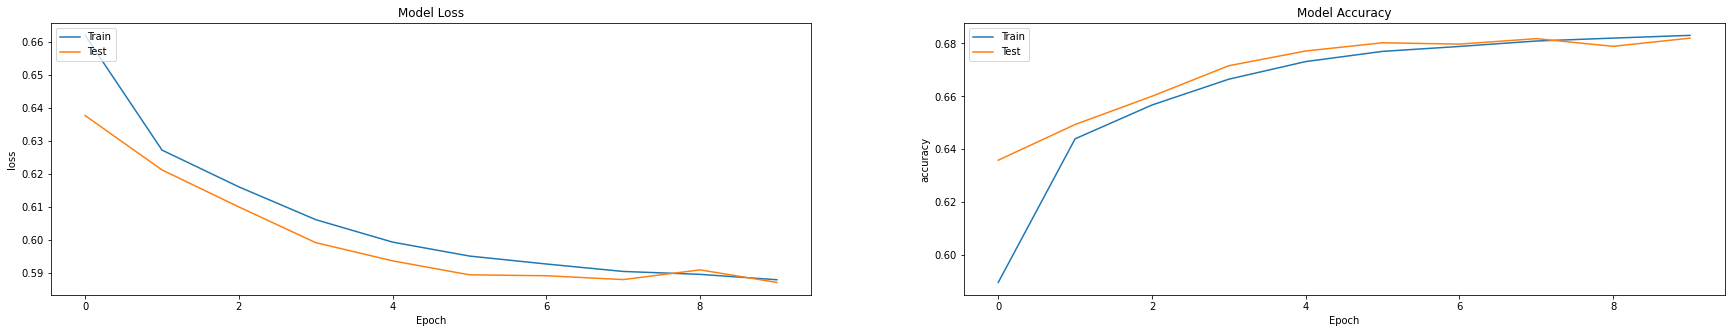

In [271]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [155]:
dl_model_2=keras.Sequential()
# dl_model.add(keras.layers.LSTM(28,input_shape=(100,1),return_sequences=True)) 
#setting activation for hidden layers to relu
dl_model_2.add(keras.layers.LSTM(28,input_shape=(100,1),return_sequences=True, activation="relu"))
dl_model_2.add(keras.layers.Dropout(0.2))
#set output space to 2 -> 0 or 1 for sarcastic or non-sarcastic
dl_model_2.add(keras.layers.LSTM(14, activation="relu"))
# Dropping out half nodes at each layer to prevent overfitting. 0 < rate < 1
dl_model_2.add(keras.layers.Dropout(0.2))
# change softmax to sigmoid
dl_model_2.add(keras.layers.Dense(1,activation="sigmoid"))
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
# loss='binary_crossentropy'
dl_model_2.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
dl_model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 100, 28)           3360      
                                                                 
 dropout_28 (Dropout)        (None, 100, 28)           0         
                                                                 
 lstm_30 (LSTM)              (None, 14)                2408      
                                                                 
 dropout_29 (Dropout)        (None, 14)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 15        
                                                                 
Total params: 5,783
Trainable params: 5,783
Non-trainable params: 0
_________________________________________________________________


In [156]:
train_relu_no_split = dl_model_2.fit(np.asarray(X_train),np.asarray(y_train),epochs=10)

Epoch 1/10
6310/6310 [==============================] - 356s 56ms/step - loss: 2089.0032 - accuracy: 0.5330
Epoch 2/10
6310/6310 [==============================] - 404s 64ms/step - loss: 0.7049 - accuracy: 0.5376
Epoch 3/10
6310/6310 [==============================] - 573s 91ms/step - loss: 0.6860 - accuracy: 0.5393
Epoch 4/10
6310/6310 [==============================] - 479s 76ms/step - loss: 0.7155 - accuracy: 0.5292
Epoch 5/10
6310/6310 [==============================] - 314s 50ms/step - loss: 0.6891 - accuracy: 0.5258
Epoch 6/10
6310/6310 [==============================] - 395s 63ms/step - loss: 0.6875 - accuracy: 0.5317
Epoch 7/10
6310/6310 [==============================] - 471s 75ms/step - loss: 102563.1016 - accuracy: 0.5335
Epoch 8/10
6310/6310 [==============================] - 451s 71ms/step - loss: 0.6858 - accuracy: 0.5407
Epoch 9/10
6310/6310 [==============================] - 320s 51ms/step - loss: 0.6851 - accuracy: 0.5427
Epoch 10/10
6310/6310 [========================

In [297]:
type(X_test[0])

numpy.ndarray

In [162]:
relu_hidden_score = dl_model_2.evaluate(np.asarray(X_test), np.asarray(y_test_ndarray), verbose=0)

In [163]:
print("%s: %.2f%%" % (dl_model_2.metrics_names[1], relu_hidden_score[1]*100))

accuracy: 52.11%


Findings so far: relu in our hidden layers reduces the accuracy of our model.
Why? {KIV}

Stick to sigmoid - more intuitive for the final layer since its a binary classification problem.




To determine the number of activation functions in hidden layer:
https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046

<h4>𝑁ℎ= 𝑁𝑠 / (𝛼∗(𝑁𝑖+𝑁𝑜))</h4>

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.



In [264]:
n_i = 100 #size of vector
n_0 = 1 #output neuron
n_s = train_data.shape[0]
alpha = 2

In [267]:
n_h = n_s / (alpha * (n_i + n_0))
n_h
#FUCKED UP LOL

3998.2524752475247

In [294]:
basic_lstm_model=keras.Sequential()
# dl_model.add(keras.layers.LSTM(28,input_shape=(100,1),return_sequences=True)) 
#setting activation for hidden layers to relu
basic_lstm_model.add(keras.layers.LSTM(32,input_shape=(100,1)))
# basic_lstm_model.add(keras.layers.Dropout(0.2))
basic_lstm_model.add(keras.layers.Flatten())
basic_lstm_model.add(keras.layers.Dense(1,activation='sigmoid'))
basic_lstm_model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
basic_lstm_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 32)                4352      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [303]:
type(y_test)

tuple

In [305]:
basic_lstm_history = basic_lstm_model.fit(np.asarray(tuple(train_data['vectorized_comment'])), np.asarray(tuple(train_data['label'])),epochs=10)

Epoch 1/10
25239/25239 [==============================] - 739s 29ms/step - loss: 0.6520 - accuracy: 0.6112
Epoch 2/10
25239/25239 [==============================] - 599s 24ms/step - loss: 0.6194 - accuracy: 0.6522
Epoch 3/10
25239/25239 [==============================] - 739s 29ms/step - loss: 0.6018 - accuracy: 0.6698
Epoch 4/10
25239/25239 [==============================] - 49114s 2s/step - loss: 0.5921 - accuracy: 0.6788
Epoch 5/10
25239/25239 [==============================] - 504s 20ms/step - loss: 0.6115 - accuracy: 0.6551
Epoch 6/10
25239/25239 [==============================] - 476s 19ms/step - loss: 0.6151 - accuracy: 0.6561
Epoch 7/10
25239/25239 [==============================] - 482s 19ms/step - loss: 0.5997 - accuracy: 0.6709
Epoch 8/10
25239/25239 [==============================] - 481s 19ms/step - loss: 0.5937 - accuracy: 0.6765
Epoch 9/10
25239/25239 [==============================] - 481s 19ms/step - loss: 0.5906 - accuracy: 0.6795
Epoch 10/10
25239/25239 [============

In [ ]:
basic_lstm_model_score = basic_lstm_model.evaluate(np.asarray(X_test), np.asarray(y_test_ndarray))

print("%s: %.2f%%" % (basic_lstm_model.metrics_names[1], basic_lstm_model_score[1]*100))

6318/6318 [==============================] - 29s 5ms/step - loss: 0.6195 - accuracy: 0.6573
accuracy: 65.73%


In [309]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,clean_comment,lemmatized_comment,lemmatized_parent_comment,vectorized_comment,vectorized_parent,cosine_similarity
417033,0,But it could mean a loss,warguy3440,GreenBayPackers,1.0,1.0,0.0,2015-11,2015-02-11 03:44:00,We need to take some shots down the field. Bei...,...,0,0,0,0,But it could mean a loss,But could mean loss,We need take shot field . Being way fuck caref...,"[0.5248232, -0.12512344, -0.044859868, 0.25141...","[0.84098554, -0.11928215, -0.2412101, 0.336472...",0.555788
59081,0,Donald the reality TV star does care about TV ...,rk119,politics,1.0,-1.0,-1.0,2016-10,2016-10-21 15:51:00,About 71 million watch final presidential deba...,...,0,2,0,0,Donald the reality TV star does care about TV ...,Donald reality TV star care TV rating .,About 71 million watch final presidential deba...,"[1.0974704, 0.47350964, 0.043638736, 0.3224011...","[0.874545, 0.08981396, -0.31027883, 0.5569894,...",0.479681
5664,1,me irl,PixelPickaxe,Art,1.0,-1.0,-1.0,2016-11,2016-11-27 18:34:00,How much you want to bet that the artist was m...,...,0,0,0,0,me irl,irl,How much want bet artist make regular tiger fu...,"[0.3767227, 0.09245158, -0.050391756, -0.09101...","[0.31074402, 0.13635714, 0.2935771, 0.0822913,...",0.574724
366838,1,Can't have a discussion on one without the oth...,iownakeytar,badwomensanatomy,55.0,55.0,0.0,2016-03,2016-03-28 16:33:00,"And of course there are the ""what about circum...",...,0,0,0,0,Can't have a discussion on one without the oth...,"Ca n't discussion one without , right ?",And course `` circumcision ? '' asshole ca n't...,"[-0.25111634, 0.56832474, -0.39421907, 0.48170...","[0.36939794, 0.04521792, 0.06129805, 0.0338644...",0.440326
907940,1,That dude's friend's life is nowhere near as i...,HerkDerpner,rage,1.0,1.0,0.0,2013-03,2013-03-26 02:12:00,Maybe he found out that one of his friends lik...,...,0,0,0,0,That dude's friend's life is nowhere near as i...,That dude 's friend 's life nowhere near impor...,Maybe find one friend like . He n't want embar...,"[-0.05876376, 0.27775067, -0.5188795, 0.660636...","[0.2726288, -0.029700149, -0.50782496, 1.30710...",0.348672


In [166]:
pickled_test_data = pd.read_pickle("test_data_with_comment_vectors")

In [167]:
pickled_test_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275..."
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605..."
526207,1,Totally not photoshopped...,RB30DETT,funny,11.0,11.0,0.0,2015-12,11/12/15 17:29,London Underground,Totally photoshopped ...,London Underground,Totally not photoshopped,London Underground,Totally photoshopped,London Underground,"[-0.14899243, -0.19366069, -0.20084605, 0.6875...","[-0.11780262, -0.2061242, 0.010147771, 0.53536..."
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768..."
585774,0,Maybe they should take a leaf from the lending...,MemorableYetUnique,unitedkingdom,1.0,1.0,0.0,2015-10,19/10/15 20:15,It's because they specifically want to offer l...,Maybe take leaf lending industry 's playbook o...,It 's specifically want offer loss-making ( bo...,Maybe they should take a leaf from the lending...,Its because they specifically want to offer lo...,Maybe take leaf lending industry playbook offe...,Its specifically want offer lossmaking bookie ...,"[0.022282721, 0.008266672, 0.74342155, 0.85941...","[0.8069845, 0.17959124, 0.5259561, 1.3175151, ..."


<H3> Adding features to test_data</h3>

In [169]:
test_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275..."
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605..."
526207,1,Totally not photoshopped...,RB30DETT,funny,11.0,11.0,0.0,2015-12,11/12/15 17:29,London Underground,Totally photoshopped ...,London Underground,Totally not photoshopped,London Underground,Totally photoshopped,London Underground,"[-0.14899243, -0.19366069, -0.20084605, 0.6875...","[-0.11780262, -0.2061242, 0.010147771, 0.53536..."
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768..."
585774,0,Maybe they should take a leaf from the lending...,MemorableYetUnique,unitedkingdom,1.0,1.0,0.0,2015-10,19/10/15 20:15,It's because they specifically want to offer l...,Maybe take leaf lending industry 's playbook o...,It 's specifically want offer loss-making ( bo...,Maybe they should take a leaf from the lending...,Its because they specifically want to offer lo...,Maybe take leaf lending industry playbook offe...,Its specifically want offer lossmaking bookie ...,"[0.022282721, 0.008266672, 0.74342155, 0.85941...","[0.8069845, 0.17959124, 0.5259561, 1.3175151, ..."
